In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

import matplotlib.pyplot as plt 
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

with ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zObject:
    zObject.extractall(path="/content")

In [4]:
train_data = pd.read_csv('/content/sign_mnist_train.csv')
print(train_data.shape)
train_data_array = train_data.drop(labels=['label'],axis=1).values
train_data_array = train_data_array.reshape((27455,28,28))

(27455, 785)


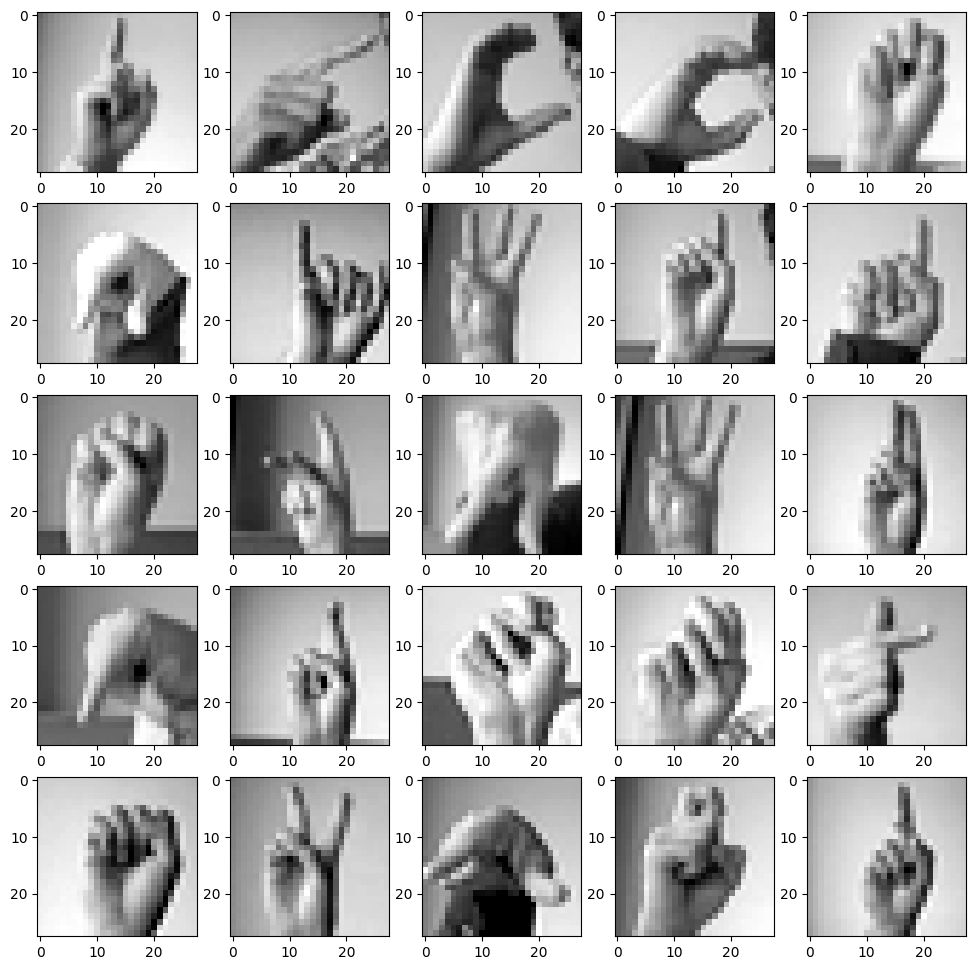

In [5]:
fig, axes = plt.subplots(5,5, figsize=(12,12))
for i,ax in enumerate(axes.flat):
    ax.imshow(np.array(train_data_array[i]).reshape(28,28),cmap=cm.gray)

In [6]:
y_label = train_data['label'].values

In [7]:
plot_dict = {}
for i in y_label:
  if i in plot_dict.keys():
    plot_dict[i]+=1
  else:
    plot_dict[i]=1

In [8]:
len(plot_dict)

24

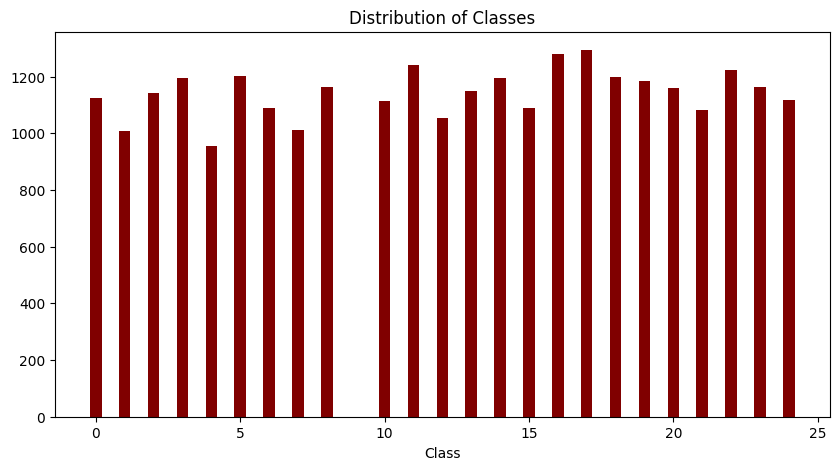

In [9]:
classes = list(plot_dict.keys())
values = list(plot_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='maroon',
        width = 0.4)
plt.xlabel("Class")
plt.title("Distribution of Classes")
plt.show()

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
 
import warnings
warnings.filterwarnings('ignore')

In [11]:
X_train = train_data_array.reshape((train_data_array.shape[0], train_data_array.shape[1], train_data_array.shape[2], 1))

In [12]:
Y_train = []
for i in y_label:
  if i>9:
    Y_train.append(i-1)
  else:
    Y_train.append(i)

In [13]:
Y_train = np.array(Y_train)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(24,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs=10)

In [ ]:
import tensorflow as tf

# Define the input layer
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

# Convolutional layer 1
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

# Convolutional layer 2
conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

# Convolutional layer 3
conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

# Flatten the output from the convolutional layers
flatten = tf.keras.layers.Flatten()(pool3)

# Dense layer 1
dense1 = tf.keras.layers.Dense(units=128, activation='relu')(flatten)

# Output layer
output = tf.keras.layers.Dense(units=24, activation='softmax')(dense1)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=output)

# Print the model summary
model.summary()



model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs=10)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, Flatten, Dense

def resnet_8():
    input_shape = (28, 28, 1)
    num_classes = 24
    
    inputs = tf.keras.Input(shape=input_shape)
    
    x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    for _ in range(2):
        residual = x
        x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = Add()([x, residual])
        x = ReLU()(x)
    
    x = Conv2D(filters=128, kernel_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    for _ in range(2):
        residual = x
        x = Conv2D(filters=128, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters=128, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = Add()([x, residual])
        x = ReLU()(x)
    
    x = Conv2D(filters=256, kernel_size=3, strides=2, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    for _ in range(2):
        residual = x
        x = Conv2D(filters=256, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters=256, kernel_size=3, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = Add()([x, residual])
        x = ReLU()(x)
    
    x = Flatten()(x)
    outputs = Dense(units=num_classes, activation="softmax")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model
model = resnet_8()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs=25)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
 
# plot results
# accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [14]:
test_data = pd.read_csv('/content/sign_mnist_test.csv')
test_data_array = test_data.drop(labels=['label'],axis=1).values
test_data_array = test_data_array.reshape((7172,28,28,1))

In [15]:
y_test = test_data['label'].values

In [16]:
Y_test = []
for i in y_test:
  if i>9:
    Y_test.append(i-1)
  else:
    Y_test.append(i)

In [17]:
Y_test = np.array(Y_test)

In [23]:
Y_pred_softmax = model.predict(test_data_array)

225/225 [==============================] - 8s 8ms/step


In [24]:
Y_pred = []
for i in Y_pred_softmax:
  Y_pred.append(np.argmax(i))

In [25]:
sum([Y_pred[i]==Y_test[i] for i in range(len(Y_pred))])/len(Y_pred)

0.9500836586726157

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))

In [ ]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

In [ ]:
model.save('/content/drive/MyDrive/SignLanguageData/Signmodel.h5')

In [37]:
import cv2
import numpy as np
def Hand_img(image_path):
  # Load the input image
  img = cv2.imread(image_path)

  # Convert the image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply a median blur to reduce noise
  gray_img = cv2.medianBlur(gray_img, 5)

  # Detect skin color regions
  lower_skin = np.array([0, 20, 70], dtype=np.uint8)
  upper_skin = np.array([20, 255, 255], dtype=np.uint8)
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_skin, upper_skin)

  # Find contours in the skin color mask
  contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (i.e., the hand)
  if len(contours) > 0:
      largest_contour = max(contours, key=cv2.contourArea)
      
      # Find the convex hull of the hand
      hull = cv2.convexHull(largest_contour)

      # Find the top, bottom, left, and right points of the hull
      top = tuple(hull[hull[:, :, 1].argmin()][0])
      bottom = tuple(hull[hull[:, :, 1].argmax()][0])
      left = tuple(hull[hull[:, :, 0].argmin()][0])
      right = tuple(hull[hull[:, :, 0].argmax()][0])
      
      # Find the wrist point
      wrist = ((left[0] + right[0]) // 2, bottom[1])

      # Crop the hand image
      hand_image = img[top[1]:wrist[1], left[0]:right[0]]
      print(top[1],wrist[1], left[0],right[0])
      cv2.imwrite('one_hand.jpg', hand_image)
  gray_img = cv2.cvtColor(hand_image, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img, (28, 28), interpolation=cv2.INTER_AREA)
  return resized_img



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

def compare_images(image1_path, image2_path):
    # Load the pre-trained ResNet50 model
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    # Load the two input images
    img1 = image.load_img(image1_path, target_size=(224, 224))
    img2 = image.load_img(image2_path, target_size=(224, 224))

    # Preprocess the images
    x1 = image.img_to_array(img1)
    x1 = np.expand_dims(x1, axis=0)
    x1 = preprocess_input(x1)

    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)

    # Use the ResNet50 model to extract features from the images
    features1 = model.predict(x1)
    features2 = model.predict(x2)

    # Compute the cosine similarity between the feature vectors
    similarity = np.dot(features1, features2.T) / (np.linalg.norm(features1) * np.linalg.norm(features2))

    # Return the similarity value
    return similarity[0][0]

# Example usage
image1_path = "one_hand.jpg"
image2_path = "left_hand.jpg"
similarity = compare_images(image1_path, image2_path)
print("The similarity value between the two hand sign images is: ", similarity)

similarity = compare_images(image1_path, "right_hand.jpg")
print("The similarity value between the two hand sign images is: ", similarity)


1/1 [==============================] - 0s 23ms/step
The similarity value between the two hand sign images is:  0.68728846
1/1 [==============================] - 0s 25ms/step
The similarity value between the two hand sign images is:  0.712597
